In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import seaborn as sns

In [21]:
df = pd.read_csv('vehicle_insurance_claims.csv')
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [22]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


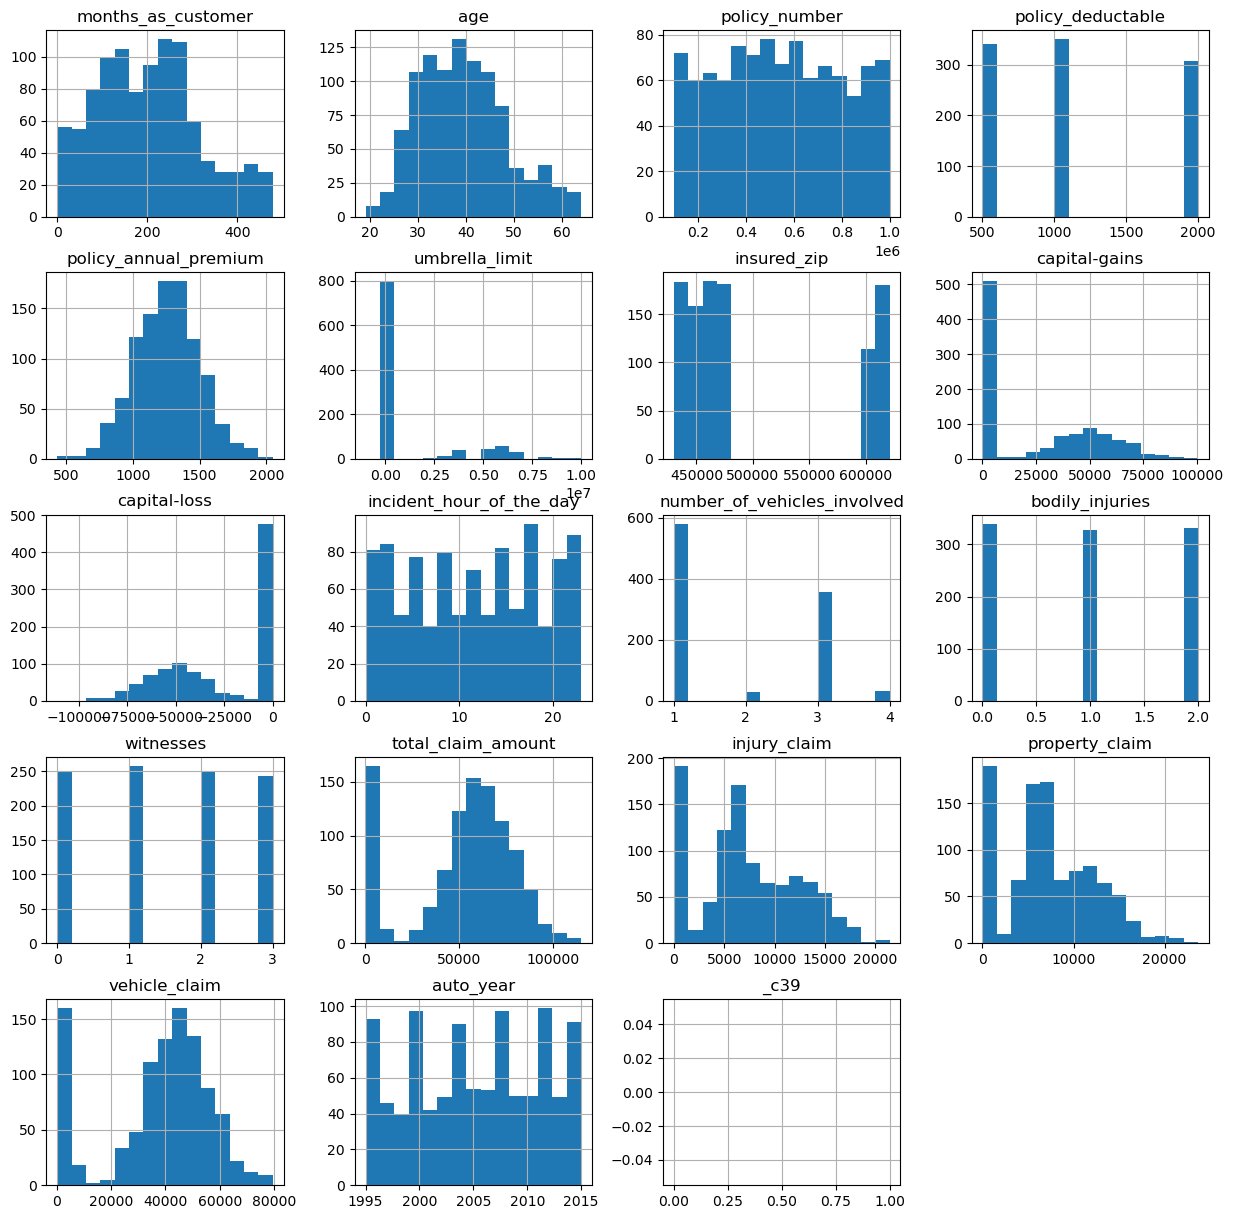

In [23]:
hist = df.hist(bins=15, figsize=(15,15))

In [24]:
df['fraud_reported'].replace({'Y': 1, 'N': 0}, inplace=True)
df['police_report_available'].replace({'YES': 1, 'NO': 0, '?': None}, inplace=True)
print(df['insured_sex'].unique())
df.head()

['MALE' 'FEMALE']


,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,1.0,71610,6510,13020,52080,Saab,92x,2004,1,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,NaN,5070,780,780,3510,Mercedes,E400,2007,1,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,0.0,34650,7700,3850,23100,Dodge,RAM,2007,0,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,0.0,63400,6340,6340,50720,Chevrolet,Tahoe,2014,1,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,0.0,6500,1300,650,4550,Accura,RSX,2009,0,NaN


In [25]:

def analyze_cohorts(df, attribute, attribute_name, bins=None):
    if bins is not None:
        df[attribute] = pd.cut(df[attribute], bins)
        
    cohorts = df.groupby(attribute)
    for cohort, group_data in cohorts:
        average_charges = group_data['total_claim_amount'].mean()
        print(f'{attribute_name}: {cohort}, Average claim: {average_charges:.2f}, Count: {len(group_data)}')
    print()
    for cohort, group_data in cohorts:
        average_freq = group_data['fraud_reported'].median()
        print(f'{attribute_name}: {cohort}, median fraud: {average_freq}')
        average_freq = group_data['fraud_reported'].mean()
        print(f'{attribute_name}: {cohort}, mean fraud: {average_freq}')

# Define cohort analyses
cohort_analyses = [
    ('age', 'Age', [0, 20, 30, 40, 50, 60, 70, float('inf')]),
    ('insured_sex', 'Gender', None),
    ('months_as_customer', 'Months as Customer', [0, 50, 100, 150, 200, 250, 300, float('inf')]),
    ('policy_state', 'State', None),
    ('insured_occupation', 'Ocupation', None),
    ('incident_city', 'City', None)
]

# Perform cohort analysis for each variable
for attribute, attribute_name, bins in cohort_analyses:
    print(f'--- {attribute_name} Cohort Analysis ---')
    analyze_cohorts(df.copy(), attribute, attribute_name, bins)
    print()


--- Age Cohort Analysis ---
Age: (0.0, 20.0], Average claim: 48655.00, Count: 2
Age: (20.0, 30.0], Average claim: 52313.95, Count: 195
Age: (30.0, 40.0], Average claim: 50024.49, Count: 396
Age: (40.0, 50.0], Average claim: 54419.59, Count: 293
Age: (50.0, 60.0], Average claim: 58444.69, Count: 96
Age: (60.0, 70.0], Average claim: 61004.44, Count: 18
Age: (70.0, inf], Average claim: nan, Count: 0

Age: (0.0, 20.0], median fraud: 0.5
Age: (0.0, 20.0], mean fraud: 0.5
Age: (20.0, 30.0], median fraud: 0.0
Age: (20.0, 30.0], mean fraud: 0.23076923076923078
Age: (30.0, 40.0], median fraud: 0.0
Age: (30.0, 40.0], mean fraud: 0.23737373737373738
Age: (40.0, 50.0], median fraud: 0.0
Age: (40.0, 50.0], mean fraud: 0.24573378839590443
Age: (50.0, 60.0], median fraud: 0.0
Age: (50.0, 60.0], mean fraud: 0.3125
Age: (60.0, 70.0], median fraud: 0.0
Age: (60.0, 70.0], mean fraud: 0.2777777777777778
Age: (70.0, inf], median fraud: nan
Age: (70.0, inf], mean fraud: nan

--- Gender Cohort Analysis ---
G

/var/folders/yk/gbf3m60d1_bgv0fsygnh_15r0000gn/T/ipykernel_40343/4168467074.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cohorts = df.groupby(attribute)
/var/folders/yk/gbf3m60d1_bgv0fsygnh_15r0000gn/T/ipykernel_40343/4168467074.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cohorts = df.groupby(attribute)


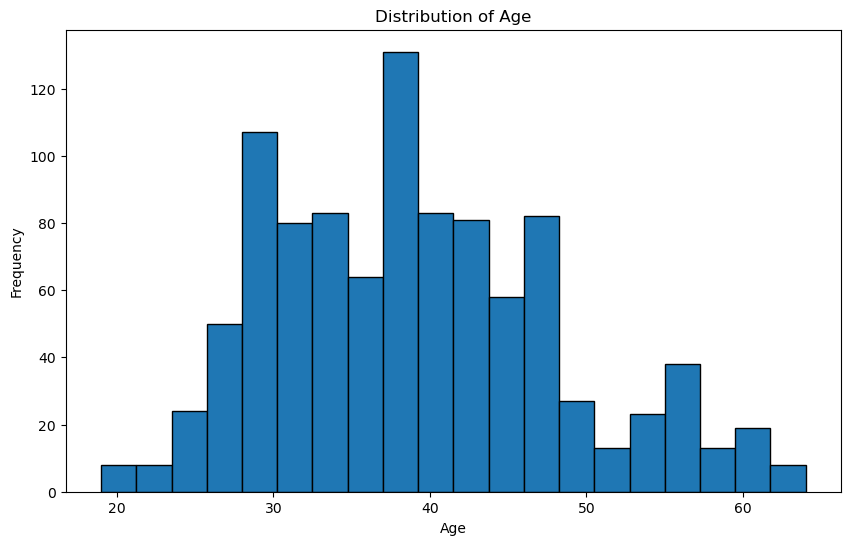

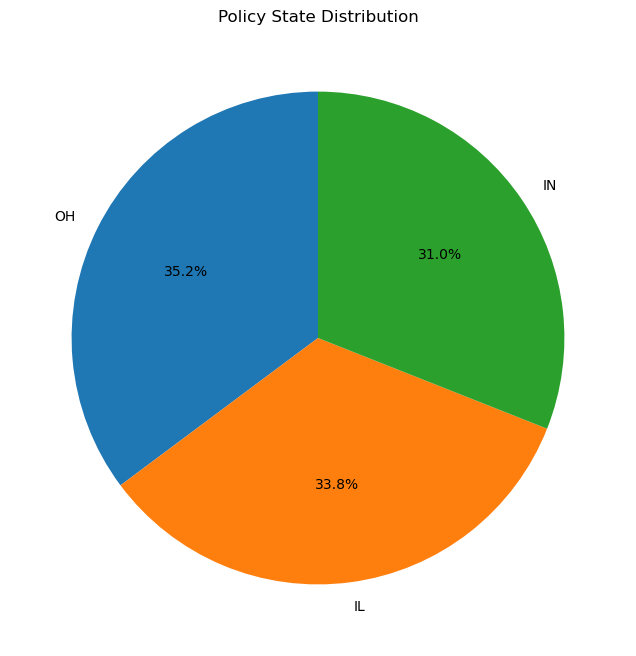

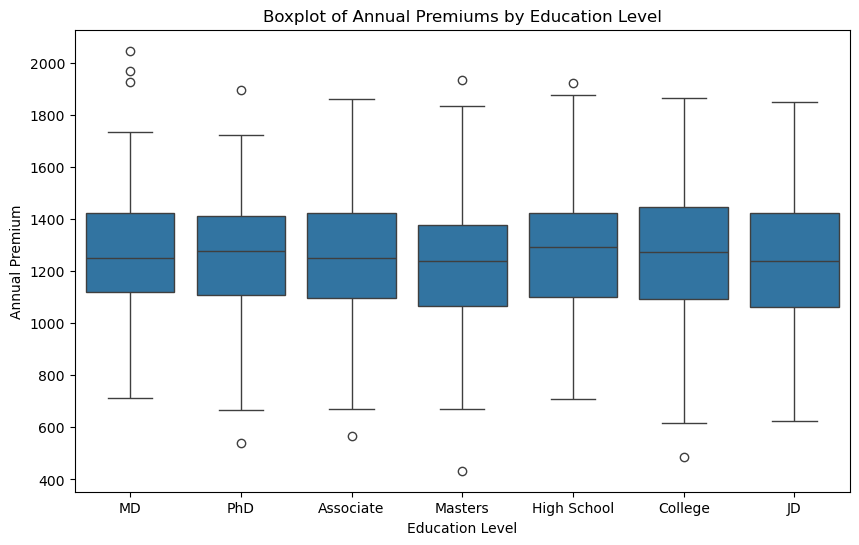

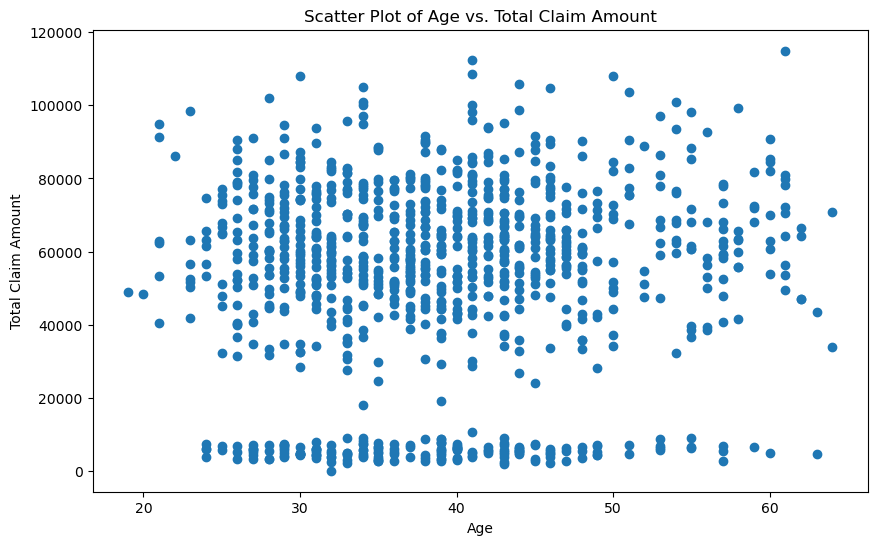

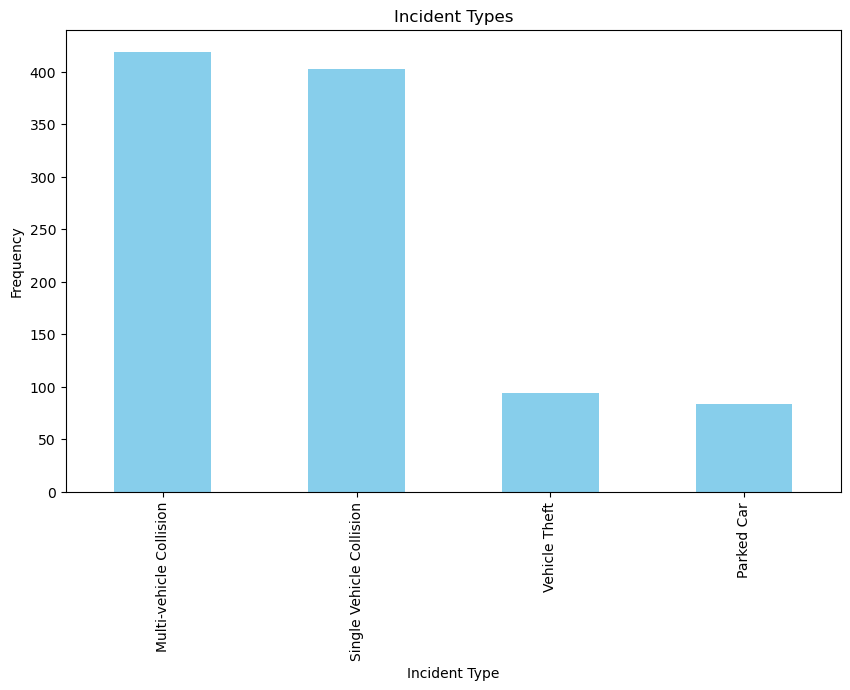

In [26]:
data = df.copy()
# Visualization 1: Histogram of Age
plt.figure(figsize=(10, 6))
plt.hist(data['age'], bins=20, edgecolor='black')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Visualization 2: Pie Chart of Policy State Distribution
plt.figure(figsize=(8, 8))
policy_state_counts = data['policy_state'].value_counts()
plt.pie(policy_state_counts, labels=policy_state_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Policy State Distribution')
plt.show()

# Visualization 3: Boxplot of Monthly Premiums by Education Level
plt.figure(figsize=(10, 6))
sns.boxplot(x='insured_education_level', y='policy_annual_premium', data=data)
plt.title('Boxplot of Annual Premiums by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Annual Premium')
plt.show()

# Visualization 4: Scatter Plot of Age vs. Total Claim Amount
plt.figure(figsize=(10, 6))
plt.scatter(data['age'], data['total_claim_amount'])
plt.title('Scatter Plot of Age vs. Total Claim Amount')
plt.xlabel('Age')
plt.ylabel('Total Claim Amount')
plt.show()

# Visualization 5: Bar Chart of Incident Types
plt.figure(figsize=(10, 6))
incident_type_counts = data['incident_type'].value_counts()
incident_type_counts.plot(kind='bar', color='skyblue')
plt.title('Incident Types')
plt.xlabel('Incident Type')
plt.ylabel('Frequency')
plt.show()

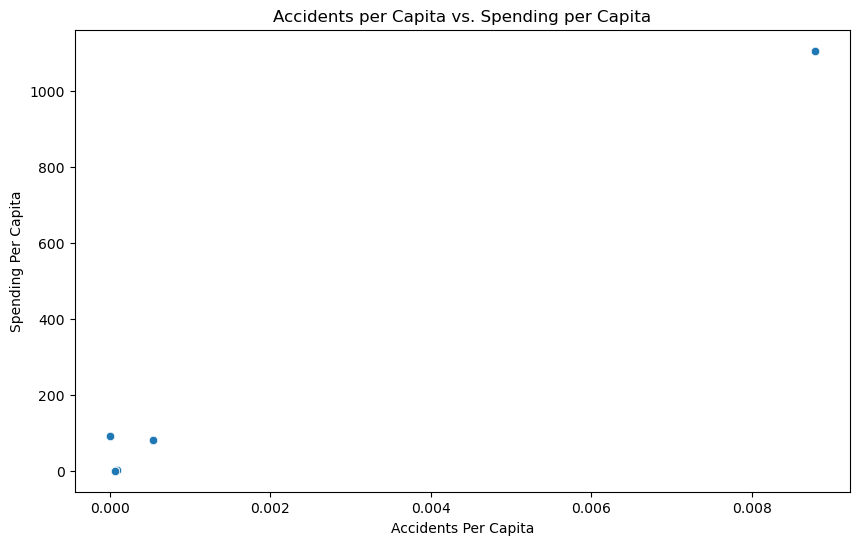

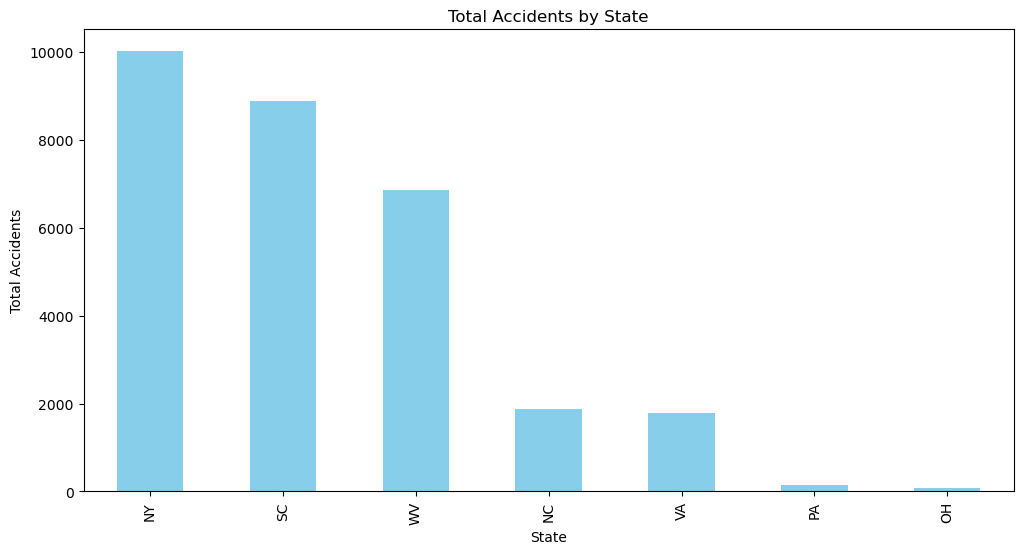

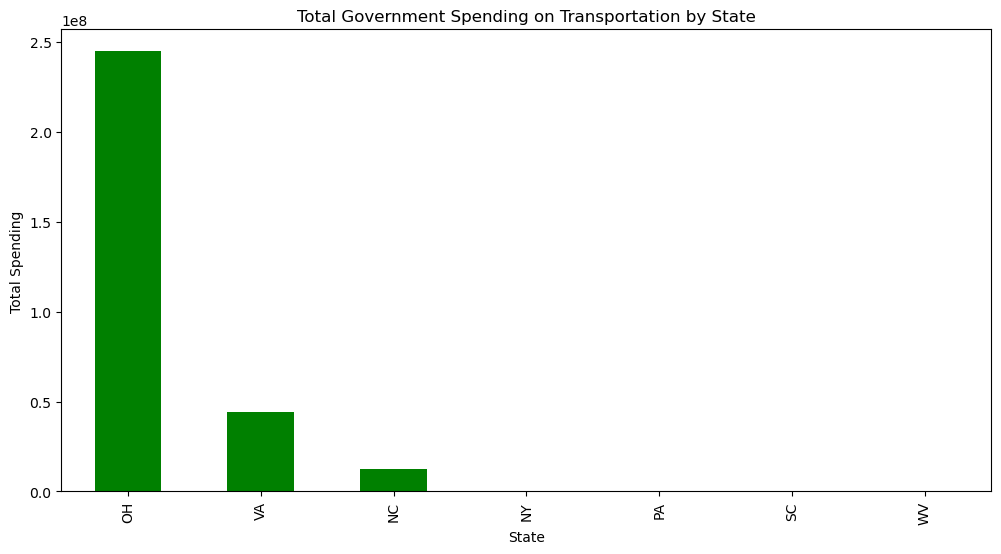

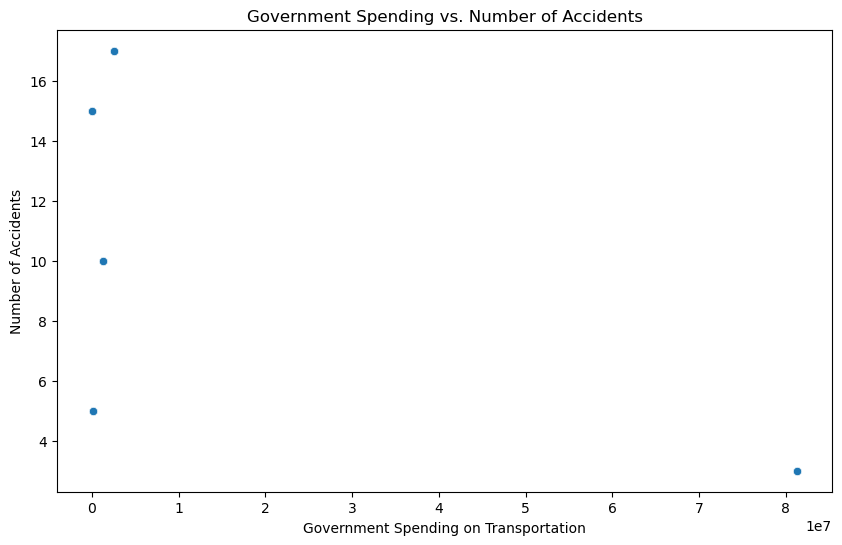

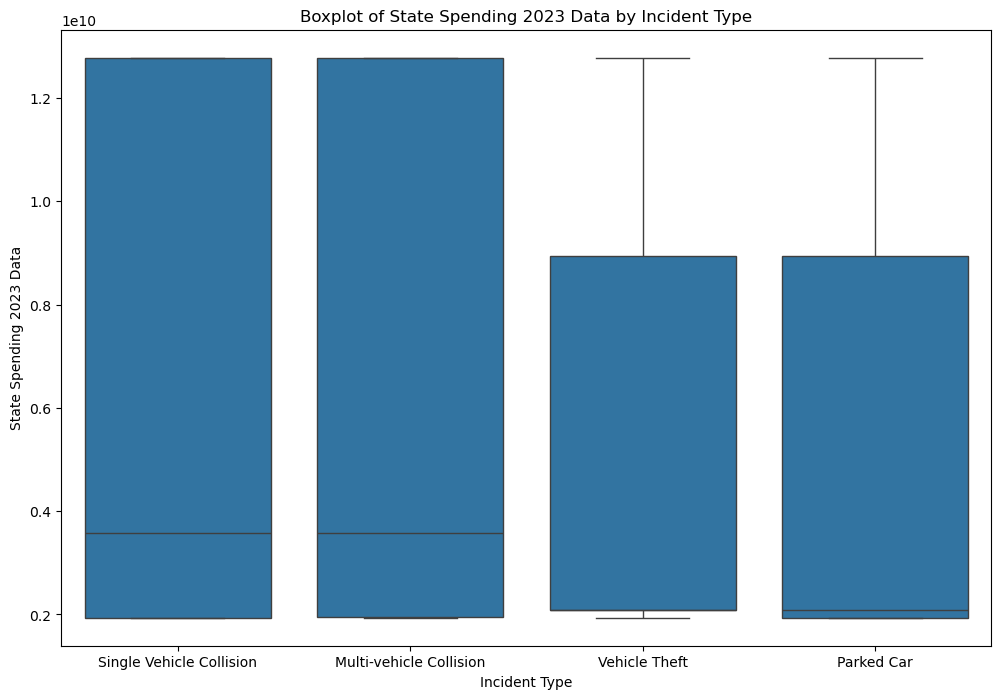

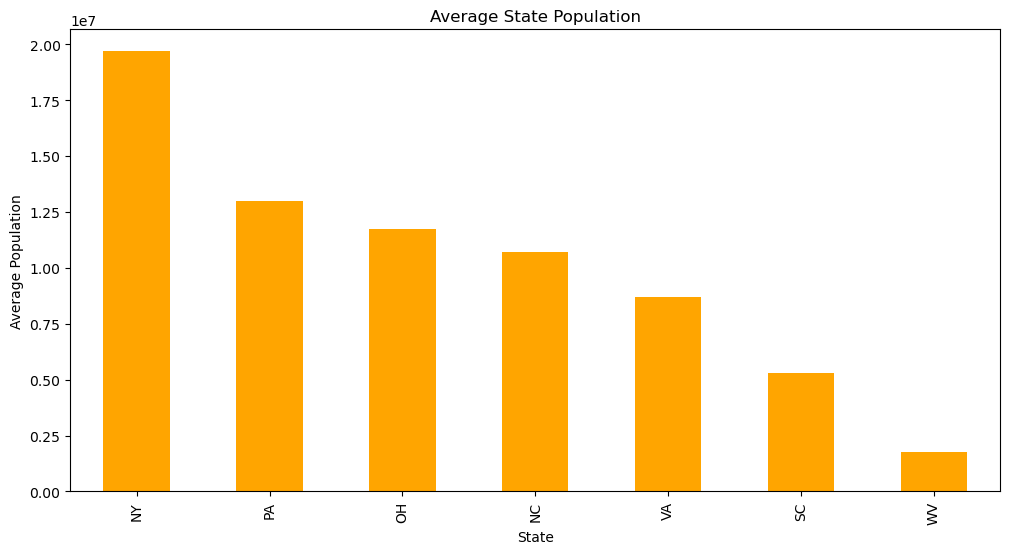

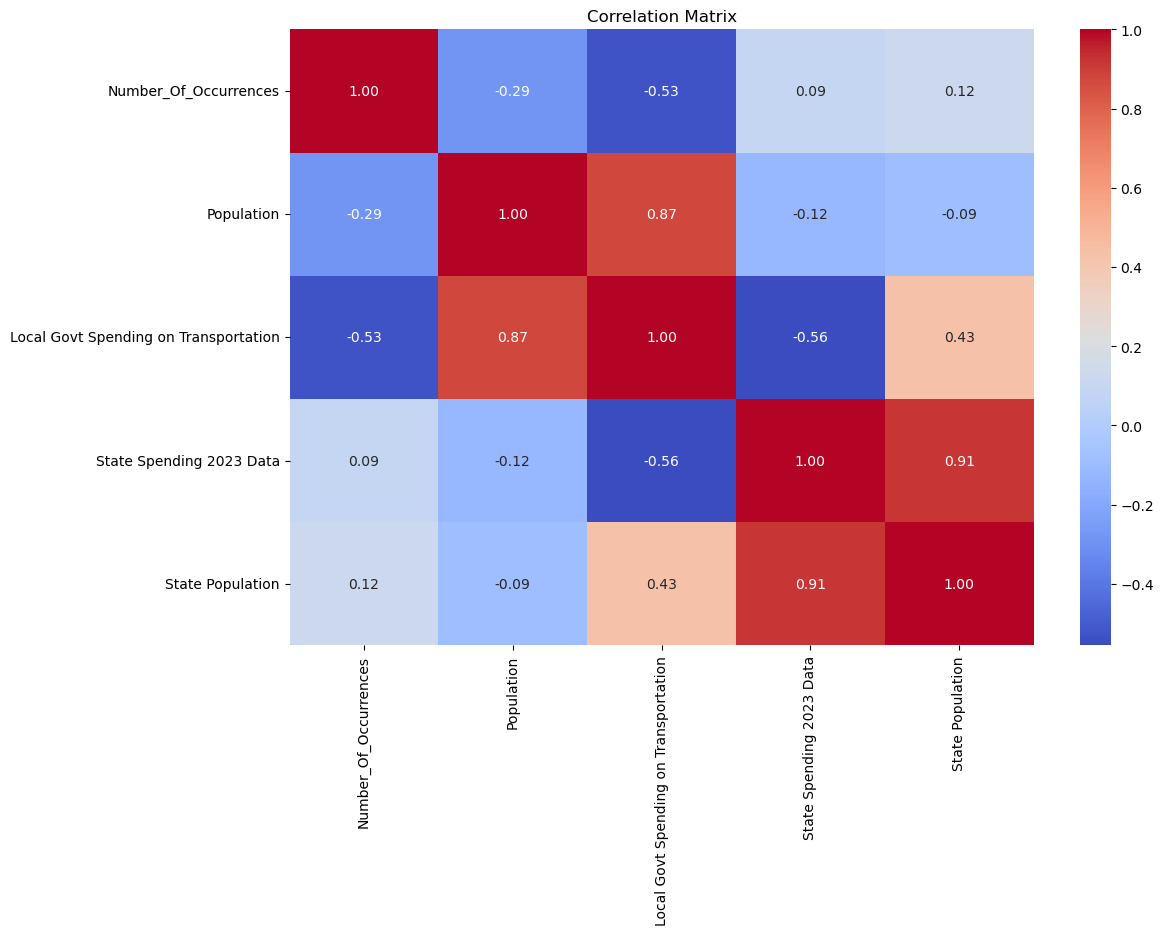

In [30]:

# Read CSV data
accidents_data = pd.read_csv("vehicle_insurance_claims.csv")
spending_data = pd.read_csv("City Crashes with updated populations and pop density and gov spending.csv")

# Merge data on State and City
merged_data = pd.merge(accidents_data, spending_data, on=['incident_state', 'incident_city'])

# Visualization 1: Scatter Plot of Accidents per Capita vs. Spending per Capita
plt.figure(figsize=(10, 6))

merged_data['Accidents Per Capita'] = (merged_data['Number_Of_Occurrences'] / merged_data['Population']) 
merged_data['Spending Per Capita'] = merged_data['Local Govt Spending on Transportation'] / merged_data['Population']
sns.scatterplot(x='Accidents Per Capita', y='Spending Per Capita', data=merged_data)
plt.title('Accidents per Capita vs. Spending per Capita')
plt.xlabel('Accidents Per Capita')
plt.ylabel('Spending Per Capita')
plt.show()

# Visualization 2: Bar Chart of Accidents by State
plt.figure(figsize=(12, 6))
state_accidents = merged_data.groupby('incident_state')['Number_Of_Occurrences'].sum().sort_values(ascending=False)
state_accidents.plot(kind='bar', color='skyblue')
plt.title('Total Accidents by State')
plt.xlabel('State')
plt.ylabel('Total Accidents')
plt.show()

# Visualization 3: Bar Chart of Spending by State
plt.figure(figsize=(12, 6))
state_spending = merged_data.groupby('incident_state')['Local Govt Spending on Transportation'].sum().sort_values(ascending=False)
state_spending.plot(kind='bar', color='green')
plt.title('Total Government Spending on Transportation by State')
plt.xlabel('State')
plt.ylabel('Total Spending')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Local Govt Spending on Transportation', y='Number_Of_Occurrences', data=merged_data)
plt.title('Government Spending vs. Number of Accidents')
plt.xlabel('Government Spending on Transportation')
plt.ylabel('Number of Accidents')
plt.show()

plt.figure(figsize=(12, 8))
sns.boxplot(x='incident_type', y='State Spending 2023 Data', data=merged_data)
plt.title('Boxplot of State Spending 2023 Data by Incident Type')
plt.xlabel('Incident Type')
plt.ylabel('State Spending 2023 Data')
plt.show()

plt.figure(figsize=(12, 6))
state_population = merged_data.groupby('incident_state')['State Population'].mean().sort_values(ascending=False)
state_population.plot(kind='bar', color='orange')
plt.title('Average State Population')
plt.xlabel('State')
plt.ylabel('Average Population')
plt.show()

correlation_matrix = merged_data[['Number_Of_Occurrences', 'Population', 'Local Govt Spending on Transportation', 'State Spending 2023 Data', 'State Population']].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


